In [4]:
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'svg' # Makes the images look nice

In [5]:
from qiskit import IBMQ, BasicAer
from qiskit.visualization import plot_histogram
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, execute
from qiskit.visualization import plot_histogram

In [6]:
def oracle_circuit(n):
    oracle_qc = QuantumCircuit(n+1)
    
    b = 2; #np.random.randint(1,2**n)
    b_str = format(b, '0'+str(n)+'b')

    print(b, b_str)
    
    for qubit in range(len(b_str)):
        if b_str[qubit] == '1':
            oracle_qc.x(qubit)

    for qubit in range(n):
        oracle_qc.cx(qubit, n)

    for qubit in range(len(b_str)):
        if b_str[qubit] == '1':
            oracle_qc.x(qubit)
    
    return oracle_qc.to_gate()

In [7]:
def deutsch_circuit(n):

    qc = QuantumCircuit(n+1,n)

    qc.x(n)
    for i in range(n+1):
        qc.h(i)
    
    qc.barrier()
    
    for k in range(2**n):
        print(k, "," , format(k, '0'+str(n)+'b'))
    
    
    b = 0#np.random.randint(1,2**n)
    b_str = format(b, '0'+str(n)+'b')
    
    for qubit in range(len(b_str)):
        if b_str[qubit] == '1':
            qc.x(qubit)

    for qubit in range(n):
        qc.cx(qubit, n)

    for qubit in range(len(b_str)):
        if b_str[qubit] == '1':
            qc.x(qubit)


    
#     oracle = oracle_circuit(n)
#     qc.append(oracle, range(n+1))
    
    qc.barrier()
    for i in range(n):
        qc.h(i)
    
    for i in range(n):
        qc.measure(i,i)

    return qc 


n = 2
qc = deutsch_circuit(n)

print(qc)


0 , 00
1 , 01
2 , 10
3 , 11
        ┌───┐      ░            ░ ┌───┐┌─┐   
q_0: |0>┤ H ├──────░───■────────░─┤ H ├┤M├───
        ├───┤      ░   │        ░ ├───┤└╥┘┌─┐
q_1: |0>┤ H ├──────░───┼────■───░─┤ H ├─╫─┤M├
        ├───┤┌───┐ ░ ┌─┴─┐┌─┴─┐ ░ └───┘ ║ └╥┘
q_2: |0>┤ X ├┤ H ├─░─┤ X ├┤ X ├─░───────╫──╫─
        └───┘└───┘ ░ └───┘└───┘ ░       ║  ║ 
 c_0: 0 ════════════════════════════════╩══╬═
                                           ║ 
 c_1: 0 ═══════════════════════════════════╩═
                                             


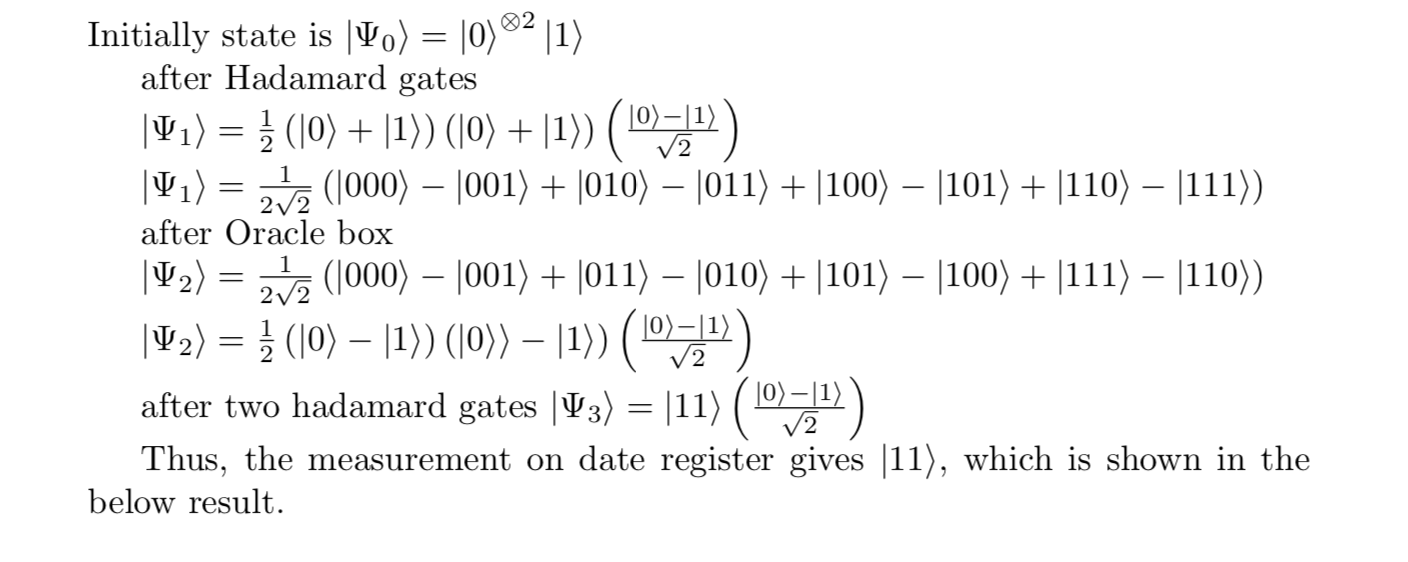

In [8]:
from IPython.display import Image
Image(filename='/Users/gimoonnam/Desktop/test.png')

In [9]:
from qiskit.tools.monitor import job_monitor

# Load local account information
IBMQ.load_account()
# Get the least busy backend
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 
                                       and not x.configuration().simulator 
                                       and x.status().operational==True))
print("least busy backend: ", backend)
# Run our circuit
job = execute(qc, backend=backend, shots=shots)
job_monitor(job, interval = 2)

results = job.result()
answer = results.get_counts()

plot_histogram(answer)


least busy backend:  ibmq_ourense


NameError: name 'shots' is not defined